In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, SGDRegressor, Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
url = '/content/boston.csv'
data = pd.read_csv(url)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# **Data Preprocessing**

In [4]:
columns = list(data.columns)
print(columns)
std = StandardScaler()
newData = pd.DataFrame(std.fit_transform(data))
cnt = 0
for col in columns:
    newData.rename(columns = {cnt: col}, inplace = True)
    cnt+=1

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


# **Data Visualization**

In [5]:
newData.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16,-5.195668e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


In [6]:
fig, axes = plt.subplots(7, 2, figsize = (80, 150))
axes = axes.ravel()
for col, ax in zip(columns, axes):
    plot = sns.histplot(newData[col], kde = True, stat='density', ax=ax)
    plot.set_xlabel(col, fontsize = 35)
    plot.set_ylabel('density', fontsize = 35)
plt.show()

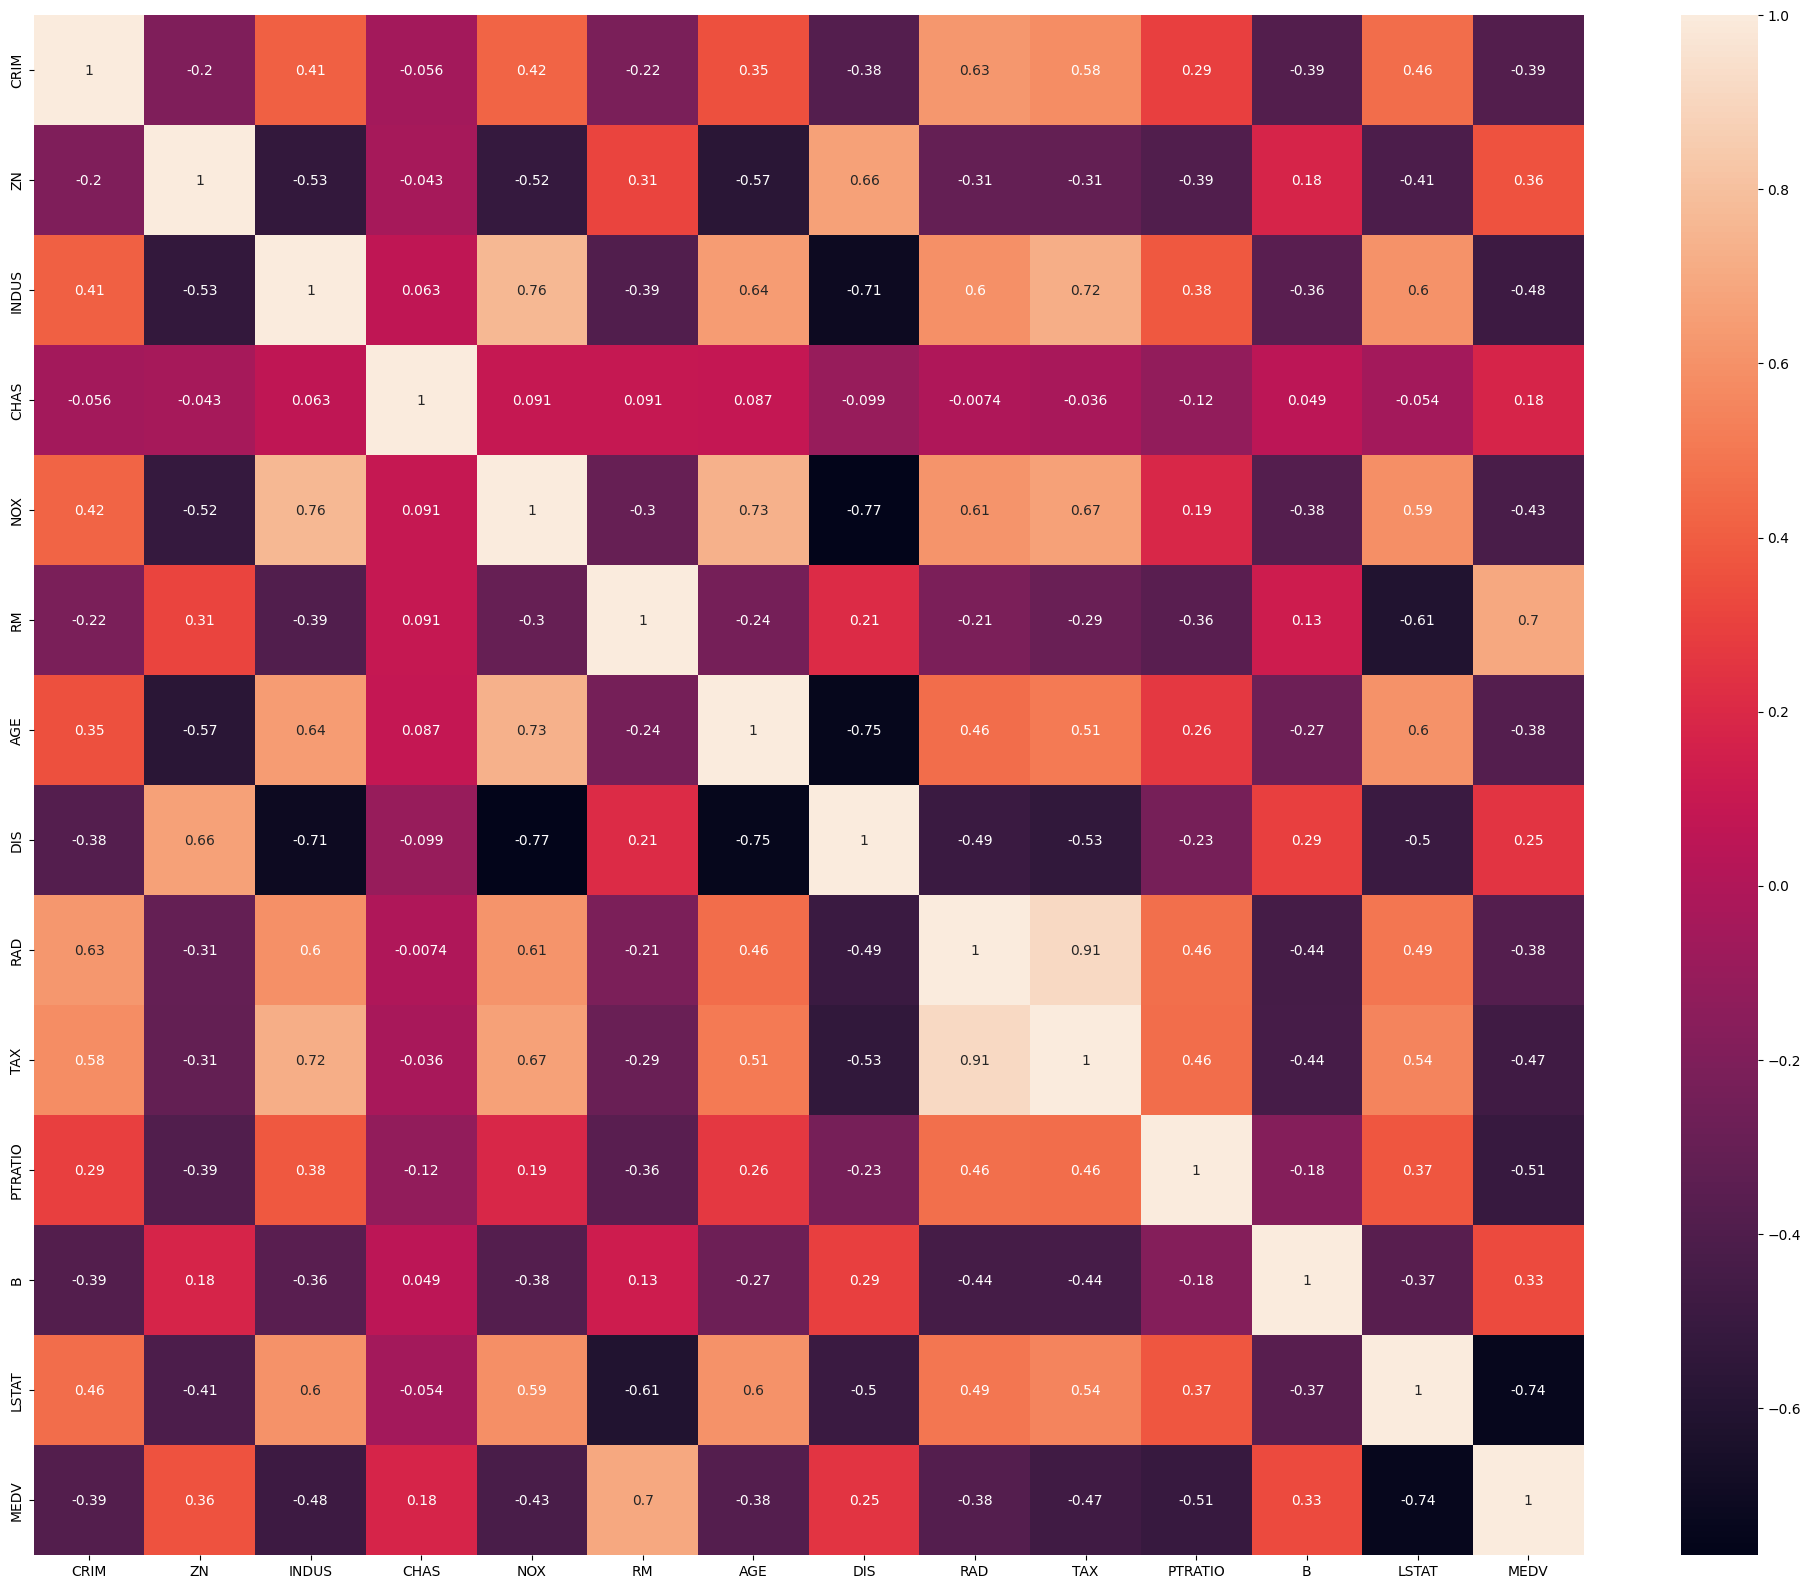

In [7]:
plt.figure(figsize = (25,20))
sns.heatmap(newData.corr(), annot = True)
plt.show()

# **Training Different Models**

In [8]:
inputs = newData.drop(['MEDV'], axis = 1)
output = newData['MEDV']
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.2, random_state = 0)

In [9]:
ms = []
ma = []
mse = mean_squared_error
mae = mean_absolute_error

In [10]:
def model_training_and_score(model, name):
    if name != "Best Model":
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mean_sq = mse(y_test, y_pred)
    mean_ab = mae(y_test, y_pred)
    print(name)
    print(mean_sq)
    print(mean_ab)
    ms.append([name, mean_sq])
    ma.append([name, mean_ab])
    print("\n")

In [11]:
models = [["Random forest", RandomForestRegressor(n_estimators = 5)],
         ['Lasso', Lasso(alpha=0.1)],
         ['Support vector', SVR()],
         ['Stochastic', SGDRegressor()],
         ['Gaussian Process', GaussianProcessRegressor(kernel=(DotProduct() + WhiteKernel()),random_state=0)],
         ['Decision Tree',DecisionTreeRegressor()],
         ['KNeighbors', KNeighborsRegressor()],
         ['Ridge regression', Ridge(alpha = 1)],
         ['Linear Regression', LinearRegression()]]

In [12]:
for model in models:
    model_training_and_score(model[1], model[0])

Random forest
0.35065237244672315
0.32687522414757664


Lasso
0.4769486973799777
0.4680926016761839


Support vector
0.2986697259315549
0.31104246617762055


Stochastic
0.42312732577411866
0.42699328121640195


Gaussian Process
0.39619158423888634
0.4193495741188618


Decision Tree
0.4090574809053896
0.3972567929429481


KNeighbors
0.42279465659445065
0.3823609970002042


Ridge regression
0.3972633680903662
0.41844270663742406


Linear Regression
0.3962231208110136
0.4182525458862097




In [13]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)
model = grid.best_estimator_
model_training_and_score(model, "Best Model")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.221 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.202 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.139 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.129 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.183 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.681 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.730 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.587 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.572 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.702 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

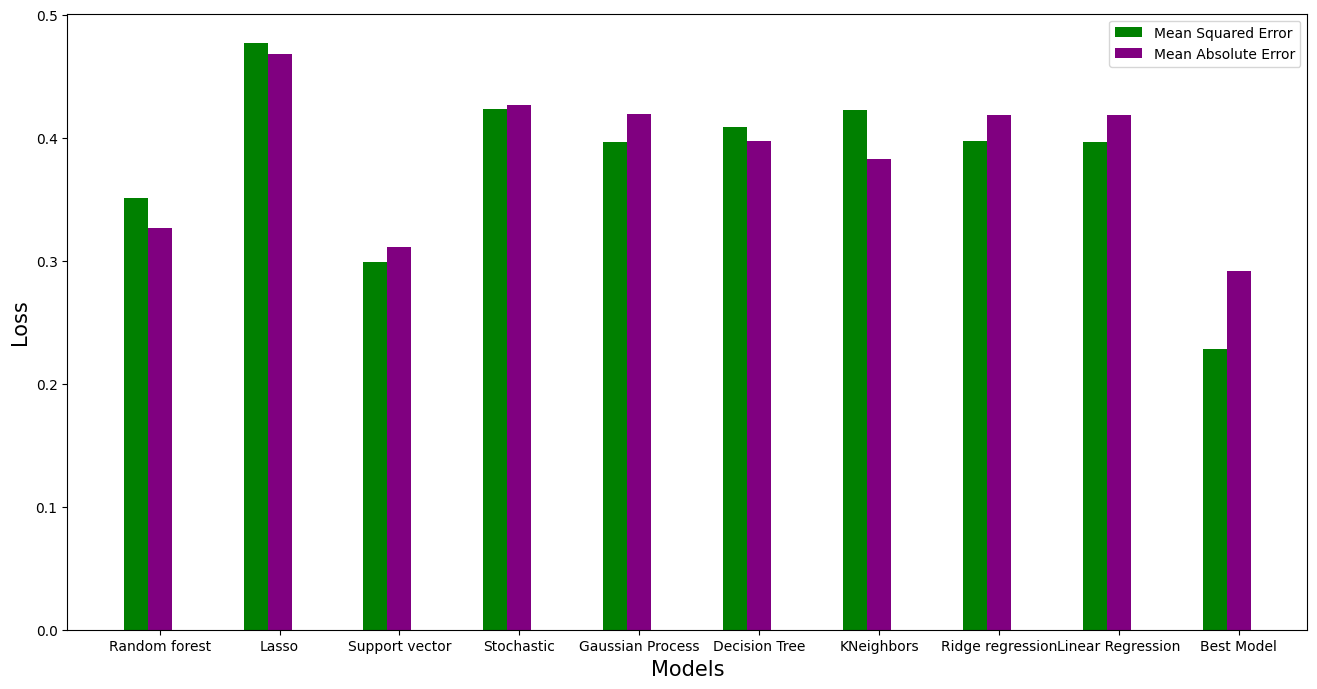

In [14]:
barwidth = 0.2
model_names = []
mean_squared = []
mean_absolute = []
for i in ma:
    model_names.append(i[0])
    mean_absolute.append(i[1])

for i in ms:
    mean_squared.append(i[1])

fig = plt.subplots(figsize =(16, 8))
br1 = np.arange(len(mean_squared))
plt.bar(br1, mean_squared, color = 'green', width=barwidth, label='Mean Squared Error')
br2 = [x + barwidth for x in br1]
plt.bar(br2, mean_absolute, color='purple', width=barwidth, label='Mean Absolute Error')
plt.xlabel("Models", fontsize = 15)
plt.ylabel("Loss", fontsize = 15)

plt.xticks([r + barwidth for r in range(len(mean_absolute))],model_names)
plt.legend()
plt.show()